# Visualisations notebook

In [26]:
# data import
import pandas as pd

wikiData = pd.read_csv("../data/all_data/cleanWiki.csv")[["Article", "Language", "Month", "Count"]]
wikiData.head(10)

,Article,Language,Month,Count
0,Benito_Mussolini,it,2024-05,4.0
1,Benito_Mussolini,it,2024-04,5.0
2,Benito_Mussolini,it,2024-03,2.0
3,Benito_Mussolini,it,2024-02,8.0
4,Benito_Mussolini,it,2024-01,13.0
5,Benito_Mussolini,it,2023-12,7.0
6,Benito_Mussolini,it,2023-11,3.0
7,Benito_Mussolini,it,2023-10,2.0
8,Benito_Mussolini,it,2023-09,9.0
9,Benito_Mussolini,it,2023-08,5.0


In [27]:
# data import

wikiData_reverted = pd.read_csv("../data/all_data/cleanWiki_reverted.csv")[["Article", "Language", "Month", "Count"]]
wikiData_reverted.head(10)

,Article,Language,Month,Count
0,Benito_Mussolini,it,2024-02,3.0
1,Benito_Mussolini,it,2024-01,2.0
2,Benito_Mussolini,it,2023-09,1.0
3,Benito_Mussolini,it,2023-08,1.0
4,Benito_Mussolini,it,2023-05,1.0
5,Benito_Mussolini,it,2023-04,1.0
6,Benito_Mussolini,it,2023-03,2.0
7,Benito_Mussolini,it,2023-02,3.0
8,Benito_Mussolini,it,2022-11,1.0
9,Benito_Mussolini,it,2022-10,3.0


In [28]:
wikiData['Article'].unique()

array(['Benito_Mussolini', 'Fall_of_the_Fascist_regime_in_Italy',
       'Italian_Social_Republic', 'Rodolfo_Graziani',
       'Ardeatine_massacre', 'Sant%27Anna_di_Stazzema_massacre',
       'Istrian-Dalmatian_exodus', 'Foibe_massacres', 'Kyiv',
       "Kievan_Rus'", 'Stepan_Bandera', 'Bohdan_Khmelnytsky', 'Cossacks',
       'Ukrainian_language', 'Holodomor', 'Borscht', 'Symon_Petliura',
       'Nakba', 'Mandatory_Palestine', '1948_Arab-Israeli_War',
       'David_Ben-Gurion', 'Yasser_Arafat', 'Six-Day_War',
       'Yom_Kippur_War', 'Hummus', 'Falafel', 'Shawarma',
       'First_Intifada', 'Flight_and_expulsion_of_Germans_(1944–1950)',
       'Expulsion_of_Germans_from_Czechoslovakia', 'Ústí_massacre',
       'Sudetenland', 'Brno_death_march', 'Beneš_decrees',
       'Sudetendeutsche_Landsmannschaft', 'German_Expellees',
       'Recovered_Territories',
       'Flight_and_expulsion_of_Germans_from_Poland_during_and_after_World_War_II',
       'Oder–Neisse_line', 'Slovak_National_Uprisi

In [29]:
## convert to datetime

from datetime import *

def convert_yyyy_mm(s: str):
    try:
        s += "-01"
        
        return datetime.strptime(s, "%Y-%m-%d")
    except:
        return None

wikiData['Date'] = wikiData['Month'].apply(convert_yyyy_mm)
wikiData_reverted['Date'] = wikiData_reverted['Month'].apply(convert_yyyy_mm)

wikiData_reverted.head(10)


,Article,Language,Month,Count,Date
0,Benito_Mussolini,it,2024-02,3.0,2024-02-01
1,Benito_Mussolini,it,2024-01,2.0,2024-01-01
2,Benito_Mussolini,it,2023-09,1.0,2023-09-01
3,Benito_Mussolini,it,2023-08,1.0,2023-08-01
4,Benito_Mussolini,it,2023-05,1.0,2023-05-01
5,Benito_Mussolini,it,2023-04,1.0,2023-04-01
6,Benito_Mussolini,it,2023-03,2.0,2023-03-01
7,Benito_Mussolini,it,2023-02,3.0,2023-02-01
8,Benito_Mussolini,it,2022-11,1.0,2022-11-01
9,Benito_Mussolini,it,2022-10,3.0,2022-10-01


In [30]:
protections=pd.read_csv("../data/all_data/protections.csv")[['article', 'language', 'start', 'end']]
protections['start'] = pd.to_datetime(protections['start'], format='mixed')
protections['end'] = pd.to_datetime(protections['end'], format='mixed')


protections.head(5)

,article,language,start,end
0,United_Nations_Partition_Plan_for_Palestine,en,2017-05-03 12:17:31,2029-12-31 23:59:59
1,United_Nations_Partition_Plan_for_Palestine,en,2016-09-07 12:39:06,2017-03-07 12:39:00
2,United_Nations_Partition_Plan_for_Palestine,en,2013-02-14 17:43:05,2013-03-14 17:43:00
3,United_Nations_Partition_Plan_for_Palestine,en,2010-05-09 03:02:50,2010-05-23 03:02:00
4,United_Nations_Partition_Plan_for_Palestine,en,2009-12-15 17:18:22,2009-12-22 17:18:00


In [31]:
import matplotlib.pyplot as plt

def plot_article(article : str, df : pd.DataFrame = wikiData, df2 : pd.DataFrame = wikiData_reverted, lang = "en", milestones = [datetime(2014,6,1), datetime(2021,4,1), datetime(2023,10,1)], timeLimit : datetime = datetime(2008,1,1)):

    
    fig, ax = plt.subplots()

    if df is not None:
        df = df[(df['Article'] == article) & (df['Language'] == lang) & (df['Date'] > timeLimit)]
        ax.plot(df['Date'], df['Count'], label='All', color = 'blue')

    if df2 is not None:
        df2 = df2[(df2['Article'] == article) & (df2['Language'] == lang) & (df2['Date'] > timeLimit)]
        ax.plot(df2['Date'], df2['Count'], label='Reverted', color = 'green')

    for m in milestones:
        ax.axvline(m, color='gray', linestyle='--', alpha=0.8)

    df_intervals = protections[(protections['article'] == article) & (protections['language'] == lang)]
    print(df_intervals)
    for index, row in df_intervals.iterrows():
        start = row['start']
        end = row['end']
        plt.axvspan(start, end, color='red', alpha=0.3, label='Protected')  
        
    # Customize the plot
    ax.set_xlabel('Date')
    ax.set_ylabel('Count')
    plt.xlim([datetime(2009,1,1), datetime(2024,5,31)])
    ax.set_title(article)
    #ax.legend(title='Language')

    # Show plot
    plt.show()



             article language               start                 end
495  Foibe_massacres       it 2024-02-13 09:31:00 2024-02-20 09:31:00
496  Foibe_massacres       it 2023-10-02 10:24:00 2023-02-13 10:24:00
497  Foibe_massacres       it 2022-11-13 21:45:00 2022-11-20 21:45:00
498  Foibe_massacres       it 2022-09-02 13:23:00 2022-02-16 13:23:00
499  Foibe_massacres       it 2021-06-16 10:34:00 2021-06-23 10:34:00
500  Foibe_massacres       it 2021-10-02 18:10:00 2021-02-13 18:10:00
501  Foibe_massacres       it 2019-10-11 16:41:00 2019-11-24 16:41:00
502  Foibe_massacres       it 2019-08-04 19:01:00 2019-08-05 19:01:00
503  Foibe_massacres       it 2019-02-17 16:47:00 2019-02-24 16:47:00
504  Foibe_massacres       it 2019-10-02 21:56:00 2019-11-02 21:56:00


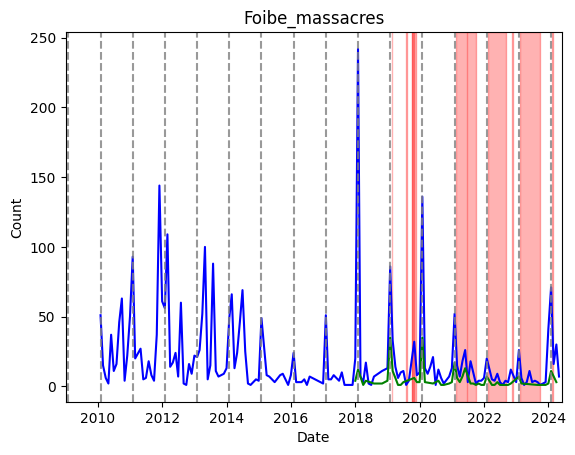

In [32]:
articles = [
    "Benito_Mussolini",
    "Fall_of_the_Fascist_regime_in_Italy",
    "Italian_Social_Republic",
    "Rodolfo_Graziani",
    "Ardeatine_massacre",
    "Sant%27Anna_di_Stazzema_massacre",
    "Istrian-Dalmatian_exodus",
    "Foibe_massacres",
]
    
langs=["it", "en"]

ms = [
    datetime(2009,2,1), 
    datetime(2010,2,1),
    datetime(2011,2,1),  
    datetime(2012,2,1), 
    datetime(2013,2,1), 
    datetime(2014,2,1),
    datetime(2015,2,1), 
    datetime(2016,2,1), 
    datetime(2017,2,1), 
    datetime(2018,2,1), 
    datetime(2019,2,1), 
    datetime(2020,2,1), 
    datetime(2021,2,1), 
    datetime(2022,2,1),
    datetime(2023,2,1),
    datetime(2024,2,1)
]
#for a in articles:
#    for l in langs:
#        plot_article(a, lang = l, milestones = ms)

plot_article("Foibe_massacres", lang = 'it', timeLimit=datetime(2010,1,1), milestones=ms)

In [38]:
from edit_wars_api import *

hummus = join_users_edits('Hummus', 'en')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [40]:
hummus['relative_edits'] = hummus['article_edits'] / hummus['total_edits']

In [43]:
hummus[hummus['total_edits'] >= 25].sort_values('relative_edits', ascending=False).head(50)


,user,timestamp,size,reverted,reversion,article,language,total_edits,article_edits,relative_edits
2211,Beyrouthhh,2008-04-28 21:46:08,10341,0,0,Hummus,en,38,16,0.421053
2219,Beyrouthhh,2008-04-28 20:58:03,9854,0,0,Hummus,en,38,16,0.421053
2214,Beyrouthhh,2008-04-28 21:39:38,10291,0,0,Hummus,en,38,16,0.421053
2215,Beyrouthhh,2008-04-28 21:18:19,10105,0,0,Hummus,en,38,16,0.421053
2220,Beyrouthhh,2008-04-28 20:54:58,9771,0,0,Hummus,en,38,16,0.421053
2191,Beyrouthhh,2008-05-03 21:00:28,9134,0,0,Hummus,en,38,16,0.421053
2193,Beyrouthhh,2008-05-03 20:34:24,9207,0,0,Hummus,en,38,16,0.421053
2212,Beyrouthhh,2008-04-28 21:45:28,10333,0,0,Hummus,en,38,16,0.421053
2216,Beyrouthhh,2008-04-28 21:15:02,10037,0,0,Hummus,en,38,16,0.421053
2194,Beyrouthhh,2008-05-03 20:33:37,9199,0,0,Hummus,en,38,16,0.421053


In [ ]:
from api_calls import *

def pull_protections(article : str, lang : str):

    if lang != 'en':
        article = get_article_name(article, "en", lang)
    
    query = 'https://{lang}.wikipedia.org/w/api.php?action=query&list=logevents&letype=protect&letitle={article}&format=json&lelimit=500&leprop=title|type|user|timestamp|comment|details'.format(
        format(lang=lang, article=article)
    )

    response = req.get(query).json()

    try:
        logevents = response['query']['logevents']
        return logevents
    except:
        print(response)
        return None

def pull_multiple_protections(articles : list, langs : list):

    output_dict = {}

    for a in articles:
        output_dict[a] = {}

        for l in langs:

            try:
                output_dict[a][l] = pull_protections(a,l)
            except:
                output_dict[a][l] = {}
    
    return output_dict

def try_except_extraction(desired_value):

    try:
        return desired_value
    except:
        return None
    
def transform_protections(input_list : list, lang : str):

    output_list = []

    # when there are no protection logs
    if input_list is None:
        return output_list
    if input_list == []:
        return output_list
    
    for log in input_list:

        transformed_log = {}
        transformed_log['timestamp'] = datetime.strptime(log["timestamp"], "%Y-%m-%dT%H:%M:%SZ")
        transformed_log['user'] = log['user']
        transformed_log['action'] = log['action']
        transformed_log['comment'] = log['comment']
        
        try:
            transformed_log['type'] = [d['type'] for d in log['parmas']['details']]
        except:
            transformed_log['type'] = ""
        
        try:
            transformed_log['level'] = [d['level'] for d in log['parmas']['details']]
        except:
            transformed_log['level'] = ""
        
        transformed_log['expiry'] = extract_expiry(log, lang)

        output_list.append(transformed_log)

    return pd.DataFrame(output_list)

def extract_expiry(log : dict, lang : str):

    # easiest way:
    try:
        expiry_str = [d['expiry'] for d in log['parmas']['details']]
        expiry = [convert_log_to_datetime(e, lang, True) for e in expiry_str]
    except:

        if log['params'] != {}:
            expiry_str = log['params']['description']
            
        elif 'comment' in log.keys():
            expiry_str = log['comment']
        else:
            print(log)
            return None
        
        try:
            expiry = convert_log_to_datetime(expiry_str, lang, False)
        except:
            print(expiry_str)
            expiry=None
    
    return expiry
    


infinite_options = [
    "indefinite",
    "unbeschränkt",
    "безстроково",
    "غير محدد",
    "бессрочно",
    "na neurčito",
    "do odvolání",
    "na zawsze",
    "infinito",
    "infinite"
]

russian_genitive_months = {
    "января": "январь",
    "февраля": "февраль",
    "марта": "март",
    "апреля": "апрель",
    "мая": "май",
    "июня": "июнь",
    "июля": "июль",
    "августа": "август",
    "сентября": "сентябрь",
    "октября": "октябрь",
    "ноября": "ноябрь",
    "декабря": "декабрь",
}

ukrainian_genitive_months = {
    "січня": "Січень",
    "лютого": "Лютий",
    "березня": "Березень",
    "квітня": "Квітень",
    "травня": "Травень",
    "червня": "Червень",
    "липня": "Липень",
    "серпня": "Серпень",
    "вересня": "Вересень",
    "жовтня": "Жовтень",
    "листопада": "Листопад",
    "грудня": "Грудень",
}

arabic_to_english_months = {
    "يناير": "January",
    "فبراير": "February",
    "مارس": "March",
    "أبريل": "April",
    "مايو": "May",
    "يونيو": "June",
    "يوليو": "July",
    "أغسطس": "August",
    "سبتمبر": "September",
    "أكتوبر": "October",
    "نوفمبر": "November",
    "ديسمبر": "December",
}


def convert_log_to_datetime(log_str: str, lang : str = "en", from_details : bool = False) -> datetime:
    
    """
    Helper function to retrieve datetime limits from protection logs
    """

    if from_details: # converts ['params']['details']
        if log_str == "infinite":
            return datetime(2029, 12, 31, 23, 59, 59)

        else:
            try:
                return datetime.strptime(
                    log_str, "%Y-%m-%dT%H:%M:%SZ"
                )
            except:
                print(log_str)
                return None
        
    format_time = "%H:%M, %d %B %Y"

    if lang == "en":
        locale.setlocale(locale.LC_ALL, "en_US")
        log_str = log_str.replace("expires ", "")

    elif lang == "de":
        locale.setlocale(locale.LC_ALL, "de_DE")
        log_str = log_str.replace("bis ", "")
        log_str = log_str.replace(" Uhr", "")

        format_time = "%d. %B %Y, %H:%M"

    elif lang == "ru":
        locale.setlocale(locale.LC_ALL, "ru_RU")
        log_str = log_str.replace("истекает ", "")

        log_str = re.sub(
            r"\b" + r"|\b".join(russian_genitive_months) + r"\b",
            lambda m: russian_genitive_months.get(m.group(), m.group()),
            log_str,
        )

    elif lang == "uk":
        locale.setlocale(locale.LC_ALL, "uk_UA")
        log_str = log_str.replace("закінчується ", "")

        log_str = re.sub(
            r"\b" + r"|\b".join(ukrainian_genitive_months) + r"\b",
            lambda m: ukrainian_genitive_months.get(m.group(), m.group()),
            log_str,
        )

    elif lang == "ar":
        locale.setlocale(locale.LC_ALL, "ar")
        log_str = log_str.replace("تنتهي في ", "")
        log_str = log_str.replace("،", ",")
        log_str = re.sub(
            r"\b" + r"|\b".join(arabic_to_english_months) + r"\b",
            lambda m: arabic_to_english_months.get(m.group(), m.group()),
            log_str,
        )
        locale.setlocale(locale.LC_ALL, "en_US")
        format_time = "%H:%M, %d %b %Y"

    elif lang == "sk":
        locale.setlocale(locale.LC_ALL, "sk")
        log_str = log_str.replace("vyprší o ", "")
        format_time = "%H:%M, %d. %B %Y"

    elif lang == "pl":
        locale.setlocale(locale.LC_ALL, "pl")
        log_str = log_str.replace("wygasa ", "")
        format_time = "%H:%M, %d %b %Y"

    elif lang == "cs":
        locale.setlocale(locale.LC_ALL, "cs")
        log_str = log_str.replace("vyprší v ", "")
        format_time = "%d. %m. %Y, %H:%M"

    elif lang == "it":
        locale.setlocale(locale.LC_ALL, "it")
        log_str = log_str.replace("scade il ", "")
        log_str = log_str.replace("scade ", "")
        log_str = log_str.replace("alle ", "")
        format_time = "%d %b %Y %H:%M"

    p = r"\(([^\)]+)\)"
    match = re.search(p, log_str).group(1)

    if (
        match == "indefinite"
        or match == "unbeschränkt"
        or match == "безстроково"
        or match == "غير محدد"
        or match == "бессрочно"
        or match == "na neurčito"
        or match == "do odvolání"
        or match == "na zawsze"
        or match == "infinito"
    ):
        return datetime(2029, 12, 31, 23, 59, 59)

    match = match.replace(" (UTC", "")

    date_string = match  # [8:-5]  # remove expires and UTC substrings

    format_times = ["%H:%M, %d %B %Y", format_time, "%H:%M, %d %b %Y"]
    for f in format_times:
        try:
            date_dt = datetime.strptime(date_string, f)
            break
        except:
            next

    locale.setlocale(locale.LC_ALL, "en_US")

    return date_dt





In [2]:
a = try_except_extraction(hovno['kkt'])
print(a)

NameError: name 'hovno' is not defined